In [4]:
from PIL import Image
import numpy as np
import os
import cv2

# img = Image.open('lighthouse2.bmp')
# imgGray = img.convert('L')
# imgGray.save('test_gray.jpg')

In [5]:
# The given image is of size (512, 768, 3)
# IN grey scale we got an image of (512, 768)
# We have applied a gaussian filter of N(0,10)
# The noisy image is of size (512, 768)
img = cv2.imread('lighthouse2.bmp')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noisy_img = gray_img.copy()
cv2.randn(noisy_img,(0),(10)) 
noisy_img = gray_img + noisy_img
# cv2.imshow('image',noisyimg)
# cv2.destroyAllWindows() 

plt.imshow(gray_img)
plt.show()

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [4]:
# ## Add white Gaussian Noise to the image
# row,col= imgGray.size
# mean = 0
# var = 100
# sigma = var**0.5
# gauss = np.random.normal(mean,sigma,(row,col))
# gauss = gauss.reshape(col,row)
# noisy = imgGray + gauss
# cv2.imshow('image1',noisy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [27]:
def gaussian_filter(shape =(3,3), sigma=1):
    x, y = [edge //2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in range(-x, x+1)] for j in range(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter /= np.sum(g_filter)
    return g_filter


In [28]:
## Create a low pass Gaussian filter with different filter length and sigma
filterlens = [3,7,11]
sigmas = [0.1,1,2,4,8]
print(f"Filter \t Sigma \t MSE")
MSEs = []
filterind = []
for filterlen in filterlens:
    for sigma in sigmas:
        filters = gaussian_filter(shape =(filterlen,filterlen), sigma=sigma)
        flt_img = cv2.filter2D(src=noisy_img, ddepth=-1, kernel=filters)
        Y = np.square(np.subtract(gray_image,flt_img)).mean()
        filterind.append([filterlen,sigma])
        MSEs.append(Y)
        print(f"{filterlen},\t{sigma},\t{Y}")
min_kernel=filterind[MSEs.index(min(MSEs))]
print(f"The least MSE error is {min(MSEs):5f} for the filter size and sigma: {min_kernel}")


Filter 	 Sigma 	 MSE
3,	0.1,	30.434476216634113
3,	1,	37.70234171549479
3,	2,	44.11730194091797
3,	4,	45.45504506429037
3,	8,	45.78126780192057
7,	0.1,	30.434476216634113
7,	1,	38.6083730061849
7,	2,	45.83167012532552
7,	4,	47.418548583984375
7,	8,	47.80346425374349
11,	0.1,	30.434476216634113
11,	1,	38.60869344075521
11,	2,	45.75475056966146
11,	4,	47.192466735839844
11,	8,	47.589744567871094
The least MSE error is 30.434476 for the filter size and sigma: [3, 0.1]


In [20]:
I = np.identity(3)
(I-gaussian_filter(sigma=1.0)).sum()

2.0

In [6]:
## Showing the filtered image
cv2.imshow('filtered_image',noisyimg)
cv2.waitKey(5) 
# cv2.destroyAllWindows() 
filters = gaussian_filter(shape =(min_kernel[0],min_kernel[0]), sigma=min_kernel[1])
flt_img = cv2.filter2D(src=noisyimg, ddepth=-1, kernel=filters)
cv2.imshow('filtered_image',flt_img)
cv2.waitKey(5) 
# cv2.destroyAllWindows()

-1

In [17]:
## Ques2 (b) : MMSE filter on the high pass coefficients
## Generate a high pass filtered image with kernel size 3,3 and sigma 0.1
kernel = gaussian_filter(shape =(3,3), sigma=10)
# kernel = np.array([[0.0, -1.0, 0.0], 
#                    [-1.0, 4.0, -1.0],
#                    [0.0, -1.0, 0.0]])

# kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
highpass_img = cv2.filter2D(gray_image,-1,kernel)

#save result image
cv2.imshow('image',highpass_img)
cv2.waitKey(5) 
cv2.destroyAllWindows() 
var_hp = np.var(highpass_img)
var_noisy_img = np.var(gray_image)
print(f"Variance of high pass image and noisy image:{var_hp},{var_noisy_img}")



Variance of high pass image and noisy image:3.878922331295648,34.103286637200235


In [21]:
gaussian_filter(shape =(min_kernel[0],min_kernel[0]), sigma=10) #min_kernel[1]

array([[0.11074074, 0.11129583, 0.11074074],
       [0.11129583, 0.1118537 , 0.11129583],
       [0.11074074, 0.11129583, 0.11074074]])

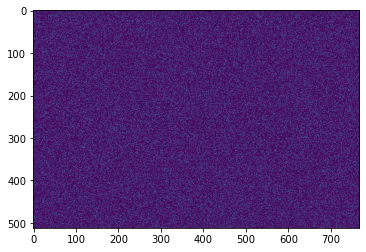

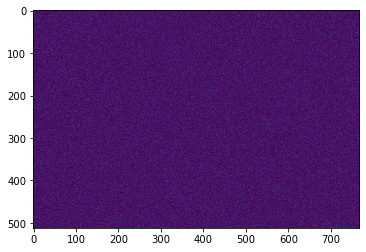

In [47]:
## Ques 2(b)
## High pass filter
import matplotlib.pyplot as plt
hpf = -np.ones((3,3))/9
hpf[1,1] = 8/9

y1 = cv2.filter2D(src=noisy_img, ddepth=-1, kernel=hpf)
z1 = cv2.filter2D(src=noise, ddepth=-1, kernel=hpf)

var_z1 = 100*((1-hpf[1,1])**2+((hpf**2).sum()-hpf[1,1]**2))
x1 = cv2.filter2D(src=img, ddepth=-1, kernel=hpf)

mu_y = np.mean(noisy_img)
var_x1 = np.var(y1)-var_z1
denoised_img = mu_y+(var_x1*y1)/(var_x1+var_z1)
plt.imshow(gray_img)
plt.show()
plt.imshow(denoised_img)
plt.show()


In [18]:
## Low pass Gaussian Filter
# from PIL import Image, ImageFilter
# filtereredimage = imgGray.filter(ImageFilter.GaussianBlur)
# filtereredimage.show()

In [19]:
# filterlens = [3,7,11]
# sigmas = [0.1,1,2,4,8]
# for filterlen in filterlens:
#     for sigma in sigmas:
#         filters = gaussian_filter(shape =(3,3), sigma=1)
#         flt_img = cv2.filter2D(src=imgGray, ddepth=-1, kernel=filters)
#         cv2.imshow('Identity', flt_img)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        
